In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'gender_submission.csv']


In [2]:

df = pd.read_csv("../input/train.csv")
df_test = pd.read_csv("../input/test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df_test['Age']
df_test.loc[df_test['Age'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
39,931,3,"Hee, Mr. Ling",male,NaN,0,0,1601,56.4958,NaN,S
41,933,1,"Franklin, Mr. Thomas Parham",male,NaN,0,0,113778,26.5500,D34,S
47,939,3,"Shaughnessy, Mr. Patrick",male,NaN,0,0,370374,7.7500,NaN,Q
54,946,2,"Mangiavacchi, Mr. Serafino Emilio",male,NaN,0,0,SC/A.3 2861,15.5792,NaN,C
58,950,3,"Davison, Mr. Thomas Henry",male,NaN,1,0,386525,16.1000,NaN,S


In [4]:
df_test.at[df_test.PassengerId == 980, 'Age'] = 28
df_test.at[df_test.PassengerId == 1044, 'Fare'] = 8.0500


In [5]:
df_test.loc[df_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [6]:
df['family'] = df.Parch + df.SibSp
df_test['family'] = df_test.Parch + df_test.SibSp

def make_title(name):
    arr_name = name.split()
    for p in arr_name : 
        if '.' in p:
            return p
    return ''
    
df_test['title'] = df_test.Name.apply(make_title)
df['title'] = df.Name.apply(make_title)

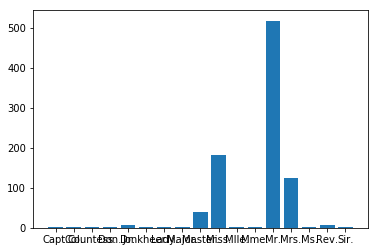

In [7]:
a, b = np.unique(df.title, return_counts=True)
plt.bar(a, b);

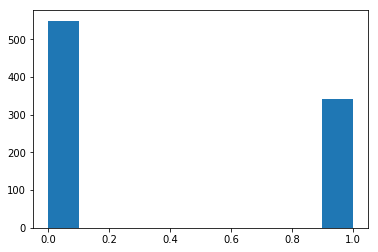

In [8]:
plt.hist(df.Survived); 

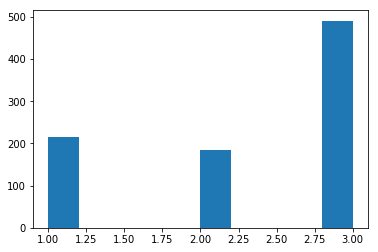

In [9]:
plt.hist(df.Pclass);

In [10]:
print (list(df))
print (list(df_test))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'family', 'title']
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'family', 'title']


In [11]:
df_title_groped = df.groupby(['title'],as_index =False).mean()
ave_age_title = df_title_groped[['title','Age']]

df_title_groped_test = df_test.groupby(['title'],as_index =False).mean()
ave_age_title_test = df_title_groped_test[['title','Age']]


print (ave_age_title)
print (ave_age_title_test)

        title        Age
0       Capt.  70.000000
1        Col.  58.000000
2   Countess.  33.000000
3        Don.  40.000000
4         Dr.  42.000000
5   Jonkheer.  38.000000
6       Lady.  48.000000
7      Major.  48.500000
8     Master.   4.574167
9       Miss.  21.773973
10      Mlle.  24.000000
11       Mme.  24.000000
12        Mr.  32.368090
13       Mrs.  35.898148
14        Ms.  28.000000
15       Rev.  43.166667
16       Sir.  49.000000
     title        Age
0     Col.  50.000000
1    Dona.  39.000000
2      Dr.  53.000000
3  Master.   7.406471
4    Miss.  21.774844
5      Mr.  32.000000
6     Mrs.  38.903226
7      Ms.  28.000000
8     Rev.  35.500000


In [12]:

df = df.merge(ave_age_title, how='inner', on = ['title'])
df_test = df_test.merge(ave_age_title_test, how='inner', on = ['title'])


In [13]:
import math

In [14]:
def age_func(data):
    if math.isnan(data['Age_x']):
        return data['Age_y']
    else:
        return data['Age_x']


In [15]:

df["Age"] = df.apply(age_func, axis=1)
df_test["Age"] = df_test.apply(age_func, axis=1)


In [16]:
df.head()
df_test.head()

,PassengerId,Pclass,Name,Sex,Age_x,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,title,Age_y,Age
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,Mr.,32.0,34.5
1,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,Mr.,32.0,62.0
2,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,Mr.,32.0,27.0
3,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0,Mr.,32.0,14.0
4,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,2,Mr.,32.0,26.0


In [17]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age_x,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,title,Age_y,Age
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,Mr.,32.0,34.5
1,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,Mr.,32.0,62.0
2,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,Mr.,32.0,27.0
3,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0,Mr.,32.0,14.0
4,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,2,Mr.,32.0,26.0


In [18]:
def corr_color(daf):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(daf.corr());
    fig.colorbar(cax)
    ax.set_xticklabels(list(daf.columns.values));
    ax.set_yticklabels(list(daf.columns.values));
    

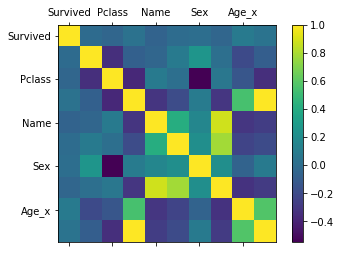

In [19]:
corr_color(df)

               Sex  Survived
Sex       1.000000  0.543351
Survived  0.543351  1.000000


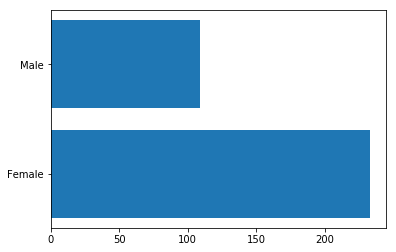

In [20]:
bin_gender = lambda x: 0 if x == 'male' else 1

df_gender = df.copy()
df_gender_test = df_test.copy()

df_gender.Sex = df.Sex.apply(bin_gender)
df_gender_test.Sex = df_test.Sex.apply(bin_gender)
print (df_gender[['Sex', 'Survived']].corr())

female_survived = df_gender['Survived'].loc[df_gender['Sex']==1]
male_survived = df_gender['Survived'].loc[df_gender['Sex']==0]

bars = ['Female', 'Male']
y_pos = np.arange(len(bars))
plt.barh(y_pos,[female_survived.sum(), male_survived.sum()]);
plt.yticks(y_pos, bars);

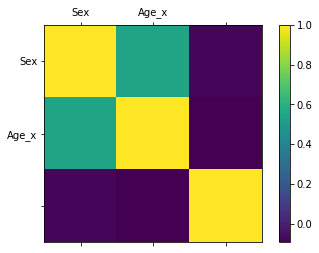

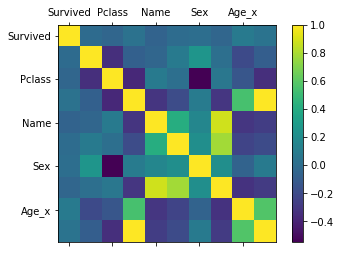

In [21]:
corr_color(df_gender[['Survived','Sex','Age_x']])
corr_color(df)

In [22]:
df = df_gender.drop('Age_x', axis=1)
df = df.drop('Age_y',axis=1)
df = df.drop('Cabin',axis=1)

df_test = df_gender_test.drop('Age_x', axis=1)
df_test = df_test.drop('Age_y',axis=1)
df_test = df_test.drop('Cabin',axis=1)

#print(df.head())
df_test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,family,title,Age
0,892,3,"Kelly, Mr. James",0,0,0,330911,7.8292,Q,0,Mr.,34.5
1,894,2,"Myles, Mr. Thomas Francis",0,0,0,240276,9.6875,Q,0,Mr.,62.0
2,895,3,"Wirz, Mr. Albert",0,0,0,315154,8.6625,S,0,Mr.,27.0
3,897,3,"Svensson, Mr. Johan Cervin",0,0,0,7538,9.2250,S,0,Mr.,14.0
4,899,2,"Caldwell, Mr. Albert Francis",0,1,1,248738,29.0000,S,2,Mr.,26.0


In [23]:
df[['Age', 'Survived']].corr()

,Age,Survived
Age,1.000000,-0.089135
Survived,-0.089135,1.000000


In [24]:
#df[df.PassengerId == 980].Age = '28'
#df_test.at[df_test.PassengerId == 980]
#df_test.at[df.PassengerId == 980, 'Age'] = '28'
#df_test.iloc[[411]]['Age']= 28
#df_test[df_test.Age.isnull()]
#df.loc[df.Embarked == np.nan, 'Embarked']
#df.at[df.Embarked == np.nan, 'Embarked'] = 'M'
#df
#plt.hist(df.Embarked)

In [25]:
df.Ticket.describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [26]:
df['ticket_pre'] = df.Ticket.apply(lambda x:x.split()[0].replace('.','') if len(x.split())>1 else 'none')
df['ticket_suf'] = df.Ticket.apply(lambda x:x.split()[1].replace('.','') if len(x.split())>1 else x)

df_test['ticket_pre'] = df_test.Ticket.apply(lambda x:x.split()[0].replace('.','') if len(x.split())>1 else 'none')
df_test['ticket_suf'] = df_test.Ticket.apply(lambda x:x.split()[1].replace('.','') if len(x.split())>1 else x)

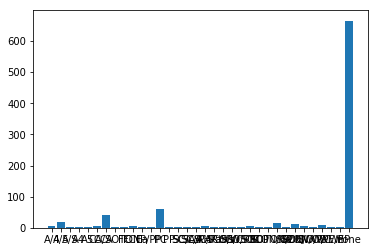

In [27]:
a, b = np.unique(df.ticket_pre, return_counts=True)
plt.bar(a, b);

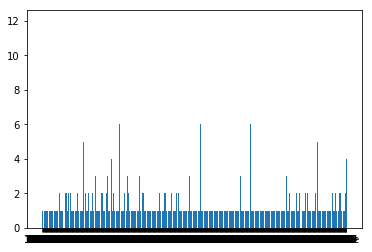

In [28]:
a, b = np.unique(df.ticket_suf, return_counts=True)
plt.bar(a, b);

In [29]:
df.ticket_pre.describe()

count      891
unique      34
top       none
freq       665
Name: ticket_pre, dtype: object

In [30]:
df_test.Fare.describe()

count    418.000000
mean      35.561214
std       55.856789
min        0.000000
25%        7.895800
50%       14.454200
75%       31.471875
max      512.329200
Name: Fare, dtype: float64

In [31]:
df_test[df_test.isnull().any(axis=1)]

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,family,title,Age,ticket_pre,ticket_suf


In [32]:
df_test.Pclass.describe()

count    418.000000
mean       2.265550
std        0.841838
min        1.000000
25%        1.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [33]:
df_test.loc[df_test.Embarked.isnull(),['ticket_suf', 'ticket_pre', 'Ticket', 'Embarked', 'Pclass']]

,ticket_suf,ticket_pre,Ticket,Embarked,Pclass


In [34]:
df_test.head()
#df_test.loc[df.Embarked.isnull(),['ticket_suf', 'ticket_pre', 'Ticket', 'Embarked', 'Pclass']]

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,family,title,Age,ticket_pre,ticket_suf
0,892,3,"Kelly, Mr. James",0,0,0,330911,7.8292,Q,0,Mr.,34.5,none,330911
1,894,2,"Myles, Mr. Thomas Francis",0,0,0,240276,9.6875,Q,0,Mr.,62.0,none,240276
2,895,3,"Wirz, Mr. Albert",0,0,0,315154,8.6625,S,0,Mr.,27.0,none,315154
3,897,3,"Svensson, Mr. Johan Cervin",0,0,0,7538,9.2250,S,0,Mr.,14.0,none,7538
4,899,2,"Caldwell, Mr. Albert Francis",0,1,1,248738,29.0000,S,2,Mr.,26.0,none,248738


In [35]:
df_grouped = df.loc[df.Embarked.notnull(),['Embarked', 'Pclass', 'title', 'Fare']].groupby('title')
df_grouped.head()

,Embarked,Pclass,title,Fare
0,S,3,Mr.,7.2500
1,S,3,Mr.,8.0500
2,Q,3,Mr.,8.4583
3,S,1,Mr.,51.8625
4,S,3,Mr.,8.0500
517,C,1,Mrs.,71.2833
518,S,1,Mrs.,53.1000
519,S,3,Mrs.,11.1333
520,C,2,Mrs.,30.0708
521,S,2,Mrs.,16.0000


In [36]:
df.at[df.Embarked.isnull(),'Embarked']='M'
df_test.at[df_test.Embarked.isnull(),'Embarked']='M'

In [37]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 14 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
family         418 non-null int64
title          418 non-null object
Age            418 non-null float64
ticket_pre     418 non-null object
ticket_suf     418 non-null object
dtypes: float64(2), int64(6), object(6)
memory usage: 49.0+ KB


In [38]:
df_test.loc[df_test['Sex'].isnull(),['ticket_suf', 'ticket_pre', 'Ticket', 'Embarked', 'Pclass', 'Name', 'title', 'Age','family', 'PassengerId', 'Sex']]

,ticket_suf,ticket_pre,Ticket,Embarked,Pclass,Name,title,Age,family,PassengerId,Sex


In [39]:
df['child'] = df.Age.apply(lambda x: 1 if x <= 16 else 0)
df_test['child'] = df_test.Age.apply(lambda x: 1 if x <= 16 else 0)

In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,family,title,Age,ticket_pre,ticket_suf,child
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,A/5 21171,7.2500,S,1,Mr.,22.00000,A/5,21171,0
1,5,0,3,"Allen, Mr. William Henry",0,0,0,373450,8.0500,S,0,Mr.,35.00000,none,373450,0
2,6,0,3,"Moran, Mr. James",0,0,0,330877,8.4583,Q,0,Mr.,32.36809,none,330877,0
3,7,0,1,"McCarthy, Mr. Timothy J",0,0,0,17463,51.8625,S,0,Mr.,54.00000,none,17463,0
4,13,0,3,"Saundercock, Mr. William Henry",0,0,0,A/5. 2151,8.0500,S,0,Mr.,20.00000,A/5,2151,0


In [41]:
df_test.head(50)

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,family,title,Age,ticket_pre,ticket_suf,child
0,892,3,"Kelly, Mr. James",0,0,0,330911,7.8292,Q,0,Mr.,34.5,none,330911,0
1,894,2,"Myles, Mr. Thomas Francis",0,0,0,240276,9.6875,Q,0,Mr.,62.0,none,240276,0
2,895,3,"Wirz, Mr. Albert",0,0,0,315154,8.6625,S,0,Mr.,27.0,none,315154,0
3,897,3,"Svensson, Mr. Johan Cervin",0,0,0,7538,9.2250,S,0,Mr.,14.0,none,7538,1
4,899,2,"Caldwell, Mr. Albert Francis",0,1,1,248738,29.0000,S,2,Mr.,26.0,none,248738,0
5,901,3,"Davies, Mr. John Samuel",0,2,0,A/4 48871,24.1500,S,2,Mr.,21.0,A/4,48871,0
6,902,3,"Ilieff, Mr. Ylio",0,0,0,349220,7.8958,S,0,Mr.,32.0,none,349220,0
7,903,1,"Jones, Mr. Charles Cresson",0,0,0,694,26.0000,S,0,Mr.,46.0,none,694,0
8,905,2,"Howard, Mr. Benjamin",0,1,0,24065,26.0000,S,1,Mr.,63.0,none,24065,0
9,908,2,"Keane, Mr. Daniel",0,0,0,233734,12.3500,Q,0,Mr.,35.0,none,233734,0


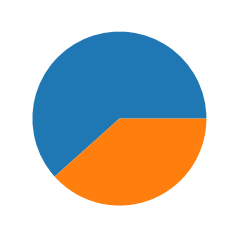

In [42]:
a,b = np.unique(df.Survived, return_counts = True)
plt.pie (b);

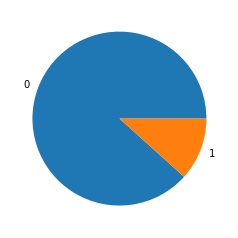

In [43]:
a,b = np.unique(df.child, return_counts = True)
plt.pie (b, labels = a);

In [44]:
total_ppl = len(df.Sex)
tot_woman = df.Sex.sum()
tot_man = total_ppl - tot_woman
df_sex_survived = df.Sex[df.Survived == 1]
df_sex_not_survived = df.Sex[df.Survived == 0]
s_woman = df_sex_survived.sum()
n_woman = df_sex_not_survived.sum()
s_man = len(df_sex_survived) - s_woman
n_man = len(df_sex_not_survived) - n_woman

<BarContainer object of 4 artists>

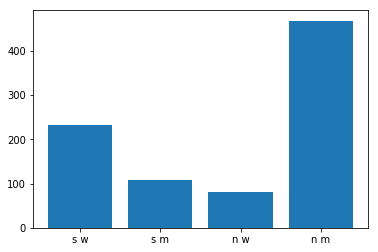

In [45]:
hights = np.array([s_woman, s_man, n_woman, n_man])
loc = np.arange(len(hights))
plt.bar(loc ,hights, tick_label = ['s w', 's m', 'n w', 'n m'])

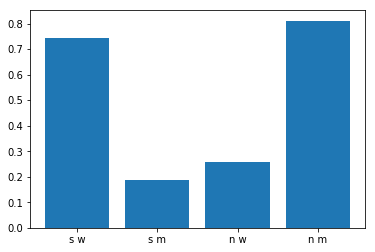

In [46]:
hights = np.array([s_woman/tot_woman, s_man/tot_man, n_woman/tot_woman, n_man/tot_man])
loc = np.arange(len(hights))
plt.bar(loc ,hights, tick_label = ['s w', 's m', 'n w', 'n m']);

In [47]:
import seaborn as sns

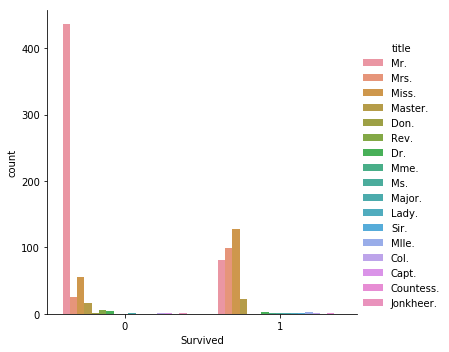

In [48]:
sns.catplot('Survived', data = df, kind='count', hue='title');

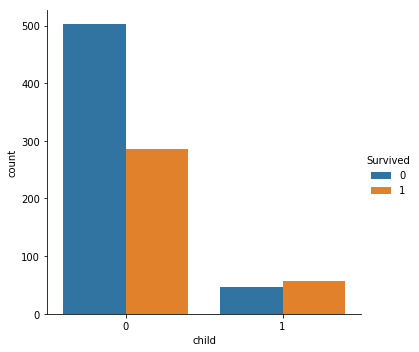

In [49]:
sns.catplot('child', data = df, kind='count', hue='Survived');

In [50]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,family,title,Age,ticket_pre,ticket_suf,child
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,A/5 21171,7.2500,S,1,Mr.,22.00000,A/5,21171,0
1,5,0,3,"Allen, Mr. William Henry",0,0,0,373450,8.0500,S,0,Mr.,35.00000,none,373450,0
2,6,0,3,"Moran, Mr. James",0,0,0,330877,8.4583,Q,0,Mr.,32.36809,none,330877,0
3,7,0,1,"McCarthy, Mr. Timothy J",0,0,0,17463,51.8625,S,0,Mr.,54.00000,none,17463,0
4,13,0,3,"Saundercock, Mr. William Henry",0,0,0,A/5. 2151,8.0500,S,0,Mr.,20.00000,A/5,2151,0


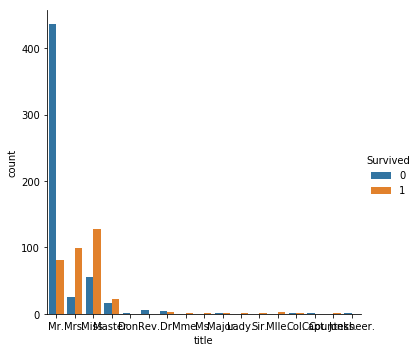

In [51]:
sns.catplot('title', data = df, kind='count', hue='Survived');

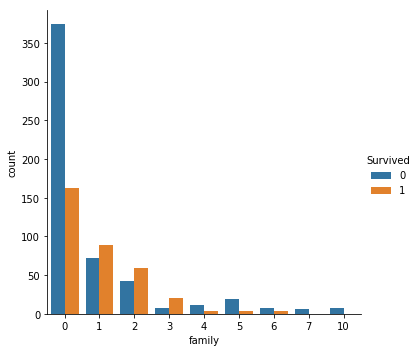

In [52]:
sns.catplot('family', data = df, kind='count', hue='Survived');

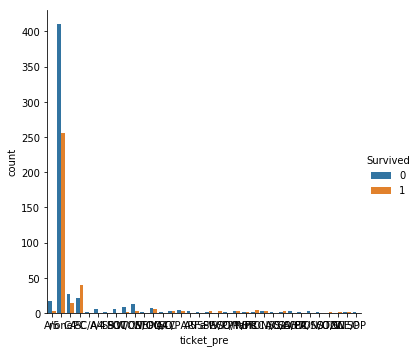

In [53]:
sns.catplot('ticket_pre', data = df, kind='count', hue='Survived');

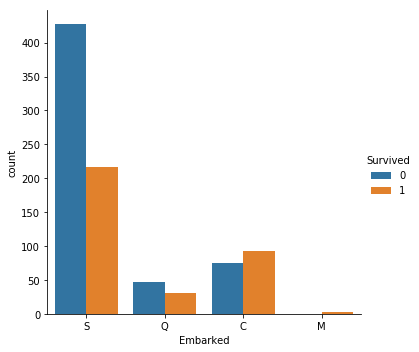

In [54]:
sns.catplot('Embarked', data = df, kind='count', hue='Survived');

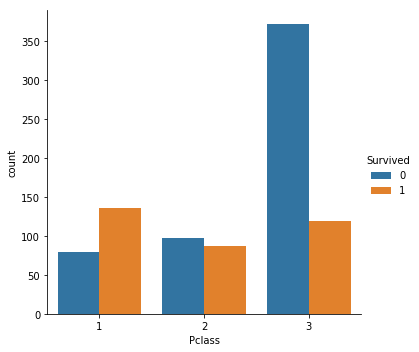

In [55]:
sns.catplot('Pclass', data = df, kind='count', hue='Survived');

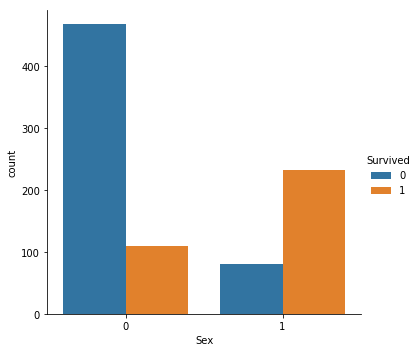

In [56]:
sns.catplot('Sex', data = df, kind='count', hue='Survived');

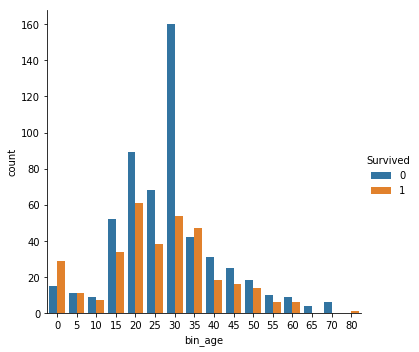

In [57]:
df['bin_age'] = df.Age.apply(lambda x: int(x/5)*5)
df_test['bin_age'] = df_test.Age.apply(lambda x: int(x/5)*5)
sns.catplot('bin_age', data = df, kind='count', hue='Survived');

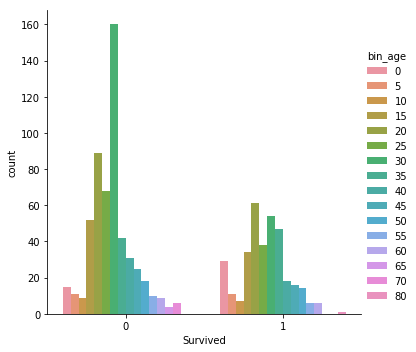

In [58]:
sns.catplot('Survived', data = df, kind='count', hue='bin_age');

In [59]:
list(df_test)
df_test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,family,title,Age,ticket_pre,ticket_suf,child,bin_age
0,892,3,"Kelly, Mr. James",0,0,0,330911,7.8292,Q,0,Mr.,34.5,none,330911,0,30
1,894,2,"Myles, Mr. Thomas Francis",0,0,0,240276,9.6875,Q,0,Mr.,62.0,none,240276,0,60
2,895,3,"Wirz, Mr. Albert",0,0,0,315154,8.6625,S,0,Mr.,27.0,none,315154,0,25
3,897,3,"Svensson, Mr. Johan Cervin",0,0,0,7538,9.2250,S,0,Mr.,14.0,none,7538,1,10
4,899,2,"Caldwell, Mr. Albert Francis",0,1,1,248738,29.0000,S,2,Mr.,26.0,none,248738,0,25


In [60]:
feature_names = ['Pclass','Sex','SibSp','Parch','Fare','Embarked','family','title','Age','ticket_pre','ticket_suf','child','bin_age', 'PassengerId']

In [61]:
X = df[feature_names]
y = df['Survived']
x_test = df_test[feature_names]

X['label'] = 'train'
x_test['label'] = 'test'

concat_x = pd.concat([X , x_test])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [62]:
X.isnull().values.any()

False

In [63]:
x_test.isnull().values.any()
#x_test

False

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [65]:
concat_x.describe()

,Pclass,Sex,SibSp,Parch,Fare,family,Age,child,bin_age,PassengerId
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.355997,0.498854,0.385027,33.276193,0.883881,29.898707,0.108480,27.883881,655.000000
std,0.837836,0.478997,1.041658,0.865560,51.743584,1.583639,13.189317,0.311104,13.360685,378.020061
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,7.895800,0.000000,21.773973,0.000000,20.000000,328.000000
50%,3.000000,0.000000,0.000000,0.000000,14.454200,0.000000,30.000000,0.000000,30.000000,655.000000
75%,3.000000,1.000000,1.000000,0.000000,31.275000,1.000000,36.000000,0.000000,35.000000,982.000000
max,3.000000,1.000000,8.000000,9.000000,512.329200,10.000000,80.000000,1.000000,80.000000,1309.000000


In [66]:
#X = pd.get_dummies(X,drop_first=True)
#x_test = pd.get_dummies(x_test,drop_first=True)
concat_x = pd.get_dummies(concat_x, drop_first=True)

X = concat_x[concat_x['label_train'] == 1]
x_test = concat_x[concat_x['label_train'] == 0]

X = X.drop('label_train', axis=1)
x_test = x_test.drop('label_train', axis=1)

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1,test_size=0.2)

In [67]:
train_X.head()

,Pclass,Sex,SibSp,Parch,Fare,family,Age,child,bin_age,PassengerId,Embarked_M,Embarked_Q,Embarked_S,title_Col.,title_Countess.,title_Don.,title_Dona.,title_Dr.,title_Jonkheer.,title_Lady.,title_Major.,title_Master.,title_Miss.,title_Mlle.,title_Mme.,title_Mr.,title_Mrs.,title_Ms.,title_Rev.,title_Sir.,ticket_pre_A/4,ticket_pre_A/5,ticket_pre_A/S,ticket_pre_A4,ticket_pre_A5,ticket_pre_AQ/3,ticket_pre_AQ/4,ticket_pre_C,ticket_pre_CA,ticket_pre_CA/SOTON,...,ticket_suf_5734,ticket_suf_5735,ticket_suf_6212,ticket_suf_65303,ticket_suf_65304,ticket_suf_65305,ticket_suf_65306,ticket_suf_6563,ticket_suf_6607,ticket_suf_6608,ticket_suf_6609,ticket_suf_680,ticket_suf_693,ticket_suf_694,ticket_suf_695,ticket_suf_7075,ticket_suf_7076,ticket_suf_7077,ticket_suf_7266,ticket_suf_7267,ticket_suf_751,ticket_suf_752,ticket_suf_7534,ticket_suf_7538,ticket_suf_7540,ticket_suf_7545,ticket_suf_7546,ticket_suf_7548,ticket_suf_7552,ticket_suf_7553,ticket_suf_7598,ticket_suf_7935,ticket_suf_8471,ticket_suf_8475,ticket_suf_851,ticket_suf_9232,ticket_suf_9234,ticket_suf_9549,ticket_suf_Basle,ticket_suf_LINE
301,3,0,1,1,7.2292,2,17.0,0,15,533,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
309,2,0,0,0,26.0000,0,27.0,0,25,552,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
516,3,0,0,0,7.7500,0,32.0,0,30,891,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
120,2,0,0,0,13.0000,0,30.0,0,30,214,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
570,1,1,1,0,52.0000,1,35.0,0,35,384,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score

In [69]:
tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(train_X, train_y)
val_predictions = tree_model.predict(val_X)
val_err = balanced_accuracy_score(val_y, val_predictions)
print(val_err)

0.7625368731563422


In [70]:
tree_model = DecisionTreeClassifier(max_leaf_nodes=10, random_state=1)
tree_model.fit(train_X, train_y)
preds_val = tree_model.predict(val_X)
val_err = balanced_accuracy_score(val_y, preds_val)
print(val_err)

0.8218691338160364


In [71]:
import numpy
tree_model_2 = DecisionTreeClassifier(max_leaf_nodes=10, random_state=1)
tree_model_2.fit(X, y)
real_preds = tree_model_2.predict(x_test)
#df_pred = pd.concat([x_test['PassengerId'], real_preds])
#df_pred = [x_test['PassengerId'],real_preds]
numpy.savetxt("f_2.csv", np.c_[x_test['PassengerId'],real_preds], delimiter=",")
#numpy.savetxt("f_2.csv", df_pred, delimiter=",")

### Random Forest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

In [73]:
rf_model = RandomForestClassifier(max_leaf_nodes=15,random_state=1)
rf_model.fit(train_X, train_y)
preds = rf_model.predict(val_X)
rf_val_err = balanced_accuracy_score(val_y, preds)
print(rf_val_err)


0.8250871547331724


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [74]:
x_test.describe()

,Pclass,Sex,SibSp,Parch,Fare,family,Age,child,bin_age,PassengerId,Embarked_M,Embarked_Q,Embarked_S,title_Col.,title_Countess.,title_Don.,title_Dona.,title_Dr.,title_Jonkheer.,title_Lady.,title_Major.,title_Master.,title_Miss.,title_Mlle.,title_Mme.,title_Mr.,title_Mrs.,title_Ms.,title_Rev.,title_Sir.,ticket_pre_A/4,ticket_pre_A/5,ticket_pre_A/S,ticket_pre_A4,ticket_pre_A5,ticket_pre_AQ/3,ticket_pre_AQ/4,ticket_pre_C,ticket_pre_CA,ticket_pre_CA/SOTON,...,ticket_suf_5734,ticket_suf_5735,ticket_suf_6212,ticket_suf_65303,ticket_suf_65304,ticket_suf_65305,ticket_suf_65306,ticket_suf_6563,ticket_suf_6607,ticket_suf_6608,ticket_suf_6609,ticket_suf_680,ticket_suf_693,ticket_suf_694,ticket_suf_695,ticket_suf_7075,ticket_suf_7076,ticket_suf_7077,ticket_suf_7266,ticket_suf_7267,ticket_suf_751,ticket_suf_752,ticket_suf_7534,ticket_suf_7538,ticket_suf_7540,ticket_suf_7545,ticket_suf_7546,ticket_suf_7548,ticket_suf_7552,ticket_suf_7553,ticket_suf_7598,ticket_suf_7935,ticket_suf_8471,ticket_suf_8475,ticket_suf_851,ticket_suf_9232,ticket_suf_9234,ticket_suf_9549,ticket_suf_Basle,ticket_suf_LINE
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.0,418.000000,418.000000,418.000000,418.0,418.0,418.000000,418.000000,418.0,418.0,418.0,418.000000,418.000000,418.0,418.0,418.000000,418.000000,418.000000,418.000000,418.0,418.000000,418.000000,418.0,418.0,418.000000,418.000000,418.000000,418.000000,418.000000,418.0,...,418.000000,418.0,418.000000,418.0,418.0,418.000000,418.0,418.0,418.000000,418.000000,418.0,418.000000,418.0,418.000000,418.0,418.0,418.0,418.0,418.000000,418.0,418.0,418.000000,418.0,418.000000,418.0,418.0,418.0,418.000000,418.0,418.0,418.0,418.000000,418.0,418.0,418.000000,418.000000,418.0,418.000000,418.0,418.0
mean,2.265550,0.363636,0.447368,0.392344,35.561214,0.839713,30.205756,0.090909,28.253589,1100.500000,0.0,0.110048,0.645933,0.004785,0.0,0.0,0.002392,0.002392,0.0,0.0,0.0,0.050239,0.186603,0.0,0.0,0.574163,0.172249,0.002392,0.004785,0.0,0.007177,0.014354,0.0,0.0,0.002392,0.002392,0.002392,0.007177,0.064593,0.0,...,0.002392,0.0,0.002392,0.0,0.0,0.002392,0.0,0.0,0.004785,0.002392,0.0,0.002392,0.0,0.002392,0.0,0.0,0.0,0.0,0.002392,0.0,0.0,0.002392,0.0,0.002392,0.0,0.0,0.0,0.002392,0.0,0.0,0.0,0.002392,0.0,0.0,0.004785,0.002392,0.0,0.002392,0.0,0.0
std,0.841838,0.481622,0.896760,0.981429,55.856789,1.519072,13.010508,0.287824,13.110407,120.810458,0.0,0.313324,0.478803,0.069088,0.0,0.0,0.048912,0.048912,0.0,0.0,0.0,0.218700,0.390059,0.0,0.0,0.495062,0.378049,0.048912,0.069088,0.0,0.084514,0.119088,0.0,0.0,0.048912,0.048912,0.048912,0.084514,0.246101,0.0,...,0.048912,0.0,0.048912,0.0,0.0,0.048912,0.0,0.0,0.069088,0.048912,0.0,0.048912,0.0,0.048912,0.0,0.0,0.0,0.0,0.048912,0.0,0.0,0.048912,0.0,0.048912,0.0,0.0,0.0,0.048912,0.0,0.0,0.0,0.048912,0.0,0.0,0.069088,0.048912,0.0,0.048912,0.0,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.000000,892.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
25%,1.000000,0.000000,0.000000,0.000000,7.895800,0.000000,22.000000,0.000000,20.000000,996.250000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
50%,3.000

In [75]:
import numpy
real_model = RandomForestClassifier(max_leaf_nodes=15,random_state=1)
real_model.fit(X, y)
real_preds = real_model.predict(x_test)
df_pred = [x_test['PassengerId'],real_preds]
numpy.savetxt("f.csv", np.c_[x_test['PassengerId'],real_preds], delimiter=",")

#numpy.savetxt("f_3.csv", df_pred, delimiter=",")

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### comparison to accuray without changing the features

In [76]:
feature_names_no = ['Pclass','Sex','SibSp','Parch','Fare','Embarked','Age']
df_no_changes = pd.read_csv("../input/train.csv")
df_no_changes = df_no_changes.dropna()
X_no = df_no_changes[feature_names_no]
y_no = df_no_changes['Survived']
X_no = pd.get_dummies(X_no,drop_first=True)

train_X_no, val_X_no, train_y_no, val_y_no = train_test_split(X_no, y_no, random_state = 1,test_size=0.2)
rf_model.fit(train_X_no, train_y_no)
preds_no = rf_model.predict(val_X_no)
rf_val_err_no = balanced_accuracy_score(val_y_no, preds_no)
print(rf_val_err_no)

0.671474358974359


In [77]:
from xgboost import XGBClassifier

In [78]:
my_model = XGBClassifier(n_estimators=10, learning_rate=0.01,max_leaf_nodes=200,random_state=1)
my_model.fit(train_X, train_y, early_stopping_rounds=10, 
             eval_set=[(val_X, val_y)],verbose=False)

predictions = my_model.predict(val_X)
print(balanced_accuracy_score(predictions, val_y))


0.8130542514345331
